step one: cleaning the data

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('/Users/nikgurunathan/dac/My-DAC-Curriculum/DAC_Internal_Project/Heart/Heart.csv')

In [42]:
# removing duplicates
df = df.drop_duplicates()
print(df.shape)

(444975, 40)


In [43]:
# Logic checks
invalid_bmi = df[(df['BMI'] < 10) | (df['BMI'] > 80)]  # BMI typically ranges from 10 to 50
invalid_sleep = df[(df['SleepHours'] < 0) | (df['SleepHours'] > 24)]  # Sleep hours must be 0-24
suspicious_sleep_values = df[(df['SleepHours'] < 3) | (df['SleepHours'] > 22)] #maybe cap as outliers (?)


print(f"Invalid BMI entries: {len(invalid_bmi)}")
print(f"Invalid Sleep Hours entries: {len(invalid_sleep)}")
print(f"Suspicious sleep hours to check again: {len(suspicious_sleep_values)}")


#Creating an Accurate Calculated BMI column
df['CalculatedBMI'] = df['WeightInKilograms'] / (df['HeightInMeters'] ** 2)

Invalid BMI entries: 80
Invalid Sleep Hours entries: 0
Suspicious sleep hours to check again: 2773


In [44]:
# If AgeCategory is '65 or older', they should likely report having at least one of the following: Heart Attack, Stroke, or Diabetes
age_category_inconsistencies = df[
    (df['AgeCategory'] == '65 or older') &
    ~(df[['HadHeartAttack', 'HadStroke', 'HadDiabetes']].any(axis=1))
]
print(f"Number of inconsistencies with Age Category logic (age 65+ but no major health conditions): {len(age_category_inconsistencies)}")


Number of inconsistencies with Age Category logic (age 65+ but no major health conditions): 0


In [45]:
# If SmokerStatus is 'Yes', they should likely report at least one of these conditions
smoker_inconsistencies = df[
    (df['SmokerStatus'] == 'Yes') &
    ~(df[['HadHeartAttack', 'HadCOPD', 'HadAsthma', 'HadStroke']].any(axis=1))  # None of these is True
]
print(f"Number of inconsistencies with Smoking status logic (smoker but no major related health conditions): {len(smoker_inconsistencies)}")

Number of inconsistencies with Smoking status logic (smoker but no major related health conditions): 0


In [46]:
# If DifficultyWalking is True, then at least one of DifficultyDressingBathing or DifficultyErrands should also be True
walking_inconsistencies = df[
    (df['DifficultyWalking'] == True) &
    ~(df[['DifficultyDressingBathing', 'DifficultyErrands']].any(axis=1))  # None of these is True
]
print(f"Number of inconsistencies with Walking Difficulty logic (difficulty walking but no related difficulties): {len(walking_inconsistencies)}")

Number of inconsistencies with Walking Difficulty logic (difficulty walking but no related difficulties): 0


In [47]:
# If HadCOPD is True, then at least one of these three difficulties should also be True
copd_inconsistencies = df[
    (df['HadCOPD'] == True) &
    ~(df[['DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands']].any(axis=1))  # None of these is True
]
print(f"Number of inconsistencies with COPD logic (COPD but no difficulties with daily activities): {len(copd_inconsistencies)}")

Number of inconsistencies with COPD logic (COPD but no difficulties with daily activities): 0


In [48]:
# If HadHeartAttack is True, then at least one of Stroke, Angina, or ChestScan should be True
heart_attack_inconsistencies = df[
    (df['HadHeartAttack'] == True) &
    ~(df[['HadStroke', 'HadAngina', 'ChestScan']].any(axis=1))  # None of these is True
]
print(f"Number of inconsistencies with Heart Attack logic (Heart Attack but no related conditions reported): {len(heart_attack_inconsistencies)}")

Number of inconsistencies with Heart Attack logic (Heart Attack but no related conditions reported): 0


In [49]:
# If SleepHours is less than 4 or more than 12, we expect at least one of the health conditions to be True
sleep_hours_inconsistencies = df[
    ((df['SleepHours'] < 5) | (df['SleepHours'] > 12)) &
    ~(df[['HadDepressiveDisorder', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadSkinCancer', 'HadAsthma', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DifficultyConcentrating', 'HighRiskLastYear']].any(axis=1))  # None of these is True
]
print(f"Number of inconsistencies with Sleep Hours logic (abnormal sleep but no related health conditions): {len(sleep_hours_inconsistencies)}")

Number of inconsistencies with Sleep Hours logic (abnormal sleep but no related health conditions): 4


In [50]:
# If PhysicalHealthDays is 0, they should not report significant limitations in daily activities
physical_health_inconsistencies = df[
    (df['PhysicalHealthDays'] == 0) &
    ~(df[['DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands']].any(axis=1))]  # No difficulty reported

In [51]:
print(f"Number of inconsistencies with Physical Health Days logic (0 health days but activity limitations): {len(physical_health_inconsistencies)}")

Number of inconsistencies with Physical Health Days logic (0 health days but activity limitations): 14233


In [52]:
# Fill in missing values for numerical + object columns
df.fillna({col: df[col].median() for col in df.select_dtypes('float64')}, inplace=True)
df.fillna({col: df[col].mode().iloc[0] for col in df.select_dtypes('object')}, inplace=True)


print(df.isnull().sum()) #to check


State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

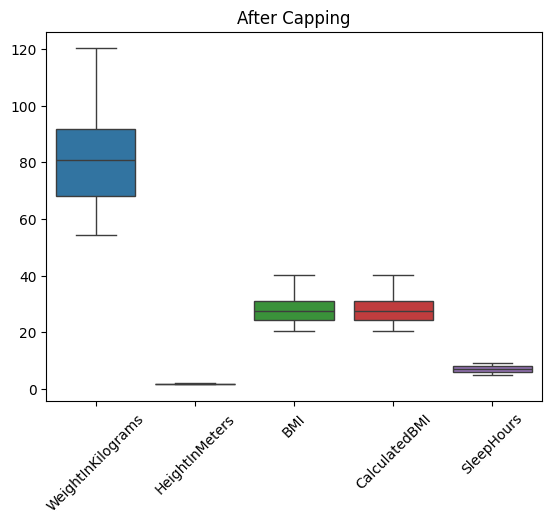

In [53]:
def cap_outliers(df, columns, lower_percentile=0.05, upper_percentile=0.95):
    for column in columns:
        lower_bound = df[column].quantile(lower_percentile)
        upper_bound = df[column].quantile(upper_percentile)
       
        # Apply capping
        df[column] = df[column].apply(lambda x: min(max(x, lower_bound), upper_bound))
   
    return df


# List of columns to cap
columns_to_cap = ['WeightInKilograms', 'HeightInMeters', 'BMI', 'CalculatedBMI', 'SleepHours']


# Apply the capping
df_cleaned = cap_outliers(df, columns_to_cap)


# Verification of capping
sns.boxplot(data=df[columns_to_cap])
plt.title("After Capping")
plt.xticks(rotation=45)
plt.show()


In [54]:
for col in df.select_dtypes(include=['category', 'object']).columns:
    df[col] = df[col].str.strip().str.lower()


In [55]:
dataframe = df.drop_duplicates()


In [56]:
dataframe.to_csv('Heart_cleaned.csv', index=False)

In [57]:
dataframe = pd.read_csv('/Users/nikgurunathan/dac/My-DAC-Curriculum/DAC_Internal_Project/Heart/Heart_cleaned.csv')

In [58]:
# converting yes/no columns to numeric
def yes_no_to_binary(entry):
    if entry == 'yes':
        return 1
    elif entry == 'no':
        return 0
    elif entry == 'no, pre-diabetes or borderline diabetes':
        return 0.5

dataframe = dataframe.applymap(lambda x: yes_no_to_binary(x) if x in ['yes', 'no', 'no, pre-diabetes or borderline diabetes'] else x)

# initialising the total risk score column
dataframe['TotalRiskScore'] = 0
dataframe['HeartAttackRisk'] = 0
dataframe['COPDRisk'] = 0
dataframe['BlindRisk'] = 0
dataframe['DepressiveRisk'] = 0
dataframe['WalkingRisk'] = 0
dataframe['KidneyRisk'] = 0
dataframe['DiabetesRisk'] = 0
dataframe['SkinCancerRisk'] = 0
dataframe['DeafRisk'] = 0

/var/folders/qn/4dpq089x26d0h5p0v709glyw0000gn/T/ipykernel_77956/3588986897.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataframe = dataframe.applymap(lambda x: yes_no_to_binary(x) if x in ['yes', 'no', 'no, pre-diabetes or borderline diabetes'] else x)


the higher the base risk score, the more disruptive the illness or inconvenience
the following is the order followed, with the allocated points from most to least disruptive:
1. heart attack, 9 points
2. COPD, 8 points
3. blind / vision difficulties, 7 points
4. depressive disorder, 6 points
5. difficulty walking, 5 points
6. kidney disease, 4 points
7. diabetes, 3 points
8. skin cancer, 2 points
9. deaf / hard of hearing, 1 point

In [59]:
# heart attack
base_heartattack = 9
# dataframe['HeartAttackRisk'] += dataframe['HadHeartAttack'] * base_heartattack
# dataframe['HeartAttackRisk'] += (dataframe['HadAngina']*2) * dataframe['HadHeartAttack']
# dataframe['HeartAttackRisk'] += ( + dataframe['HadStroke']*3) * dataframe['HadHeartAttack']
dataframe['HeartAttackRisk'] += (dataframe['HadAngina'] & dataframe['HadStroke']) * 1 * dataframe['HadHeartAttack'] # extra point if both

In [60]:
# COPD
base_copd = 8
dataframe['COPDRisk'] += dataframe['HadCOPD'] * base_copd
dataframe['COPDRisk'] += dataframe['HadAsthma'] * dataframe['HadCOPD']

def smoker_points(status):
    if status == 'never smoked':
        return 0
    elif status == 'former smoker':
        return 1
    elif status == 'current smoker - now smokes some days':
        return 2
    elif status == 'current smoker - now smokes every day':
        return 5
    return 0

dataframe['SmokerPoints'] = dataframe['SmokerStatus'].apply(smoker_points)
dataframe['COPDRisk'] += dataframe['HadCOPD'] * dataframe['SmokerPoints']

def ecig_points(usage):
    if usage == 'never used e-cigarettes in my entire life':
        return 0
    elif usage == 'not at all (right now)':
        return 1
    elif usage == 'use them some days':
        return 2
    elif usage == 'use them every day':
        return 4
    return 0

dataframe['ECigPoints'] = dataframe['ECigaretteUsage'].apply(ecig_points)
dataframe['COPDRisk'] += dataframe['HadCOPD'] * dataframe['ECigPoints']

In [61]:
# blind / vision difficulty
base_blind = 7
dataframe['BlindRisk'] += dataframe['BlindOrVisionDifficulty'] * base_blind

In [62]:
# depressive disorder
base_depressive = 6
dataframe['DepressiveRisk'] += dataframe['HadDepressiveDisorder'] * base_depressive
dataframe['DepressiveRisk'] += dataframe['DifficultyErrands'] * 2 * dataframe['HadDepressiveDisorder']
dataframe['DepressiveRisk'] += dataframe['DifficultyDressingBathing'] * 5 * dataframe['HadDepressiveDisorder']

dataframe['DepressiveRisk'] += (dataframe['DifficultyErrands'] & dataframe['DifficultyDressingBathing']) * 2 * dataframe['HadDepressiveDisorder']

In [63]:
# difficulty walking
base_walking = 5
dataframe['WalkingRisk'] += dataframe['DifficultyWalking'] * base_walking
dataframe['WalkingRisk'] += dataframe['HadArthritis'] * dataframe['DifficultyWalking']

In [64]:
# kidney disease
base_kidney = 4
dataframe['KidneyRisk'] += dataframe['HadKidneyDisease'] * base_kidney
dataframe['KidneyRisk'] += dataframe['AlcoholDrinkers'] * 2 * dataframe['HadKidneyDisease']

In [65]:
#diabetes
dataframe['DiabetesRisk'] = pd.to_numeric(dataframe['DiabetesRisk'], errors='coerce').fillna(0)
dataframe['HadDiabetes'] = pd.to_numeric(dataframe['HadDiabetes'], errors='coerce').fillna(0)


In [66]:
# diabetes
base_diabetes = 3
# dataframe['DiabetesRisk'] = pd.to_numeric(dataframe['DiabetesRisk'], errors='coerce').fillna(0)
dataframe['DiabetesRisk'] += dataframe['HadDiabetes'] * base_diabetes

In [67]:
# skin cancer
base_skincancer = 2
dataframe['SkinCancerRisk'] += dataframe['HadSkinCancer'] * base_skincancer

In [68]:
# deaf / heard of hearing
base_deaf = 1
dataframe['DeafRisk'] += dataframe['DeafOrHardOfHearing'] * base_deaf

In [69]:
dataframe['TotalRiskScore'] = (
    dataframe['HeartAttackRisk'] +
    dataframe['COPDRisk'] +
    dataframe['BlindRisk'] +
    dataframe['DepressiveRisk'] +
    dataframe['WalkingRisk'] +
    dataframe['KidneyRisk'] +
    dataframe['DiabetesRisk'] +
    dataframe['SkinCancerRisk'] +
    dataframe['DeafRisk']
)
dataframe.to_csv('/Users/nikgurunathan/dac/My-DAC-Curriculum/DAC_Internal_Project/Heart/Heart_cleaned.csv', index=False)

In [70]:
dataframe

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,COPDRisk,BlindRisk,DepressiveRisk,WalkingRisk,KidneyRisk,DiabetesRisk,SkinCancerRisk,DeafRisk,SmokerPoints,ECigPoints
0,alabama,female,very good,0.0,0.0,within past year (anytime less than 12 months ...,0,8.0,none of them,0,...,0,0,0,0,0,3.0,0,0,0,1
1,alabama,female,excellent,0.0,0.0,within past year (anytime less than 12 months ...,0,6.0,none of them,0,...,0,0,0,0,0,0.0,2,0,0,0
2,alabama,female,very good,2.0,3.0,within past year (anytime less than 12 months ...,1,5.0,none of them,0,...,0,0,0,0,0,0.0,2,0,0,0
3,alabama,female,excellent,0.0,0.0,within past year (anytime less than 12 months ...,1,7.0,none of them,0,...,0,0,0,0,0,0.0,0,0,2,0
4,alabama,female,fair,2.0,0.0,within past year (anytime less than 12 months ...,1,9.0,none of them,0,...,0,0,0,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444757,virgin islands,female,good,0.0,3.0,within past 2 years (1 year but less than 2 ye...,1,6.0,none of them,0,...,0,0,6,0,0,0.0,0,0,0,0
444758,virgin islands,female,excellent,2.0,2.0,within past year (anytime less than 12 months ...,1,7.0,none of them,0,...,0,0,0,0,0,0.0,0,0,0,0
444759,virgin islands,female,poor,30.0,30.0,5 or more years ago,0,5.0,1 to 5,0,...,0,0,0,0,0,0.0,0,0,5,2
444760,virgin islands,male,very good,0.0,0.0,within past year (anytime less than 12 months ...,0,5.0,none of them,1,...,0,0,0,0,0,0.0,0,0,0,0


step 3: setting the thresholds for general health in terms of TotalRiskPoints

General health status - maximum points allowed

for TotalRiskPoints = p
* excellent - 1 <= p <= 6
* very good - 6 < p <= 13
* good - 13 < p <= 19
* fair - 19 < p <= 30
* poor - 30 < p <= 64

In [73]:
dataframe['TrueHealth'] = "default_value"
dataframe.to_csv('Heart_Updated.csv', index=False)

In [33]:
# # defining the boundaries and encoding the column
# def assign_health_status(risk_score):
#     if 1 <= risk_score <= 6:
#         return 'excellent'
#     elif 6 < risk_score <= 13:
#         return 'very good'
#     elif 13 < risk_score <= 19:
#         return 'good'
#     elif 19 < risk_score <= 30:
#         return 'fair'
#     elif 30 < risk_score <= 64:
#         return 'poor'

# from sklearn.preprocessing import LabelEncoder

# # label_encoder = LabelEncoder()
# # dataframe['Encoded_CalculatedGeneralHealth'] = label_encoder.fit_transform(dataframe['CalculatedGeneralHealth'])


step 4: training the model

In [34]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# X = dataframe[['TotalRiskScore']] # this is the feature column
# y = dataframe['Encoded_CalculatedGeneralHealth'] # this is the target column

# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None, min_samples_split=2)

# rf_model.fit(X_train, y_train)

# y_pred = rf_model.predict(X_test)
# print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
# print(f'Classification Report: {classification_report(y_test, y_pred)}')

Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    133429

    accuracy                           1.00    133429
   macro avg       1.00      1.00      1.00    133429
weighted avg       1.00      1.00      1.00    133429



perfect accuracy suggests class imbalance (83.93% of TotalRiskScore values are '0')

In [35]:
# # checking for the optimum depth for random forest classifier
# # by creating decision tree models of varying depths and measuring the accuracy for each model

# train_acc = []
# eval_acc = []
# max_depth = 10

# # reshaping the data
# X_train = X_train.values.reshape(-1, 1) if isinstance(X_train, pd.Series) else X_train
# X_eval = X_eval.values.reshape(-1, 1) if isinstance(X_eval, pd.Series) else X_eval

# y_train = y_train.squeeze() if isinstance(y_train, pd.DataFrame) else y_train
# y_eval = y_eval.squeeze() if isinstance(y_eval, pd.DataFrame) else y_eval

# for d in range(1,max_depth+1):
#     model = DecisionTreeClassifier(max_depth=d)
#     model.fit(X_train, y_train)

#     # measuring the accuracy of this model using the training data:
#     y_pred = model.predict(X_train)
#     train_acc.append((y_pred == y_train).mean())

#     # measuring the accuracy of this model using the validation data:
#     y_pred = model.predict(X_eval)
#     eval_acc.append((y_pred == y_eval).mean())
#     print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
#           .format(d, train_acc[-1], eval_acc[-1]))
    
# # finding the optimal depth with the highest accuracy of validation data
# opt_depth = np.argmax(eval_acc) + 1

# # visualising accuracy changes with changes in depth: plotting
# plt.plot(train_acc, marker='o', label='train')
# plt.plot(eval_acc, marker='o', label='evaluation')
# plt.legend()
# plt.title('Accuracy and Tree Depth')
# plt.xlabel('tree depth')
# plt.ylabel('accuracy')
# plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
# plt.axvline(x=opt_depth-1, ls='--')
# plt.ylim(0.5, 1.0)
# plt.show()

as seen above, optimal tree depth is 1.

In [36]:
# print(X_train.shape)
# print(X_train.describe())


In [37]:
# import matplotlib.pyplot as plt
# plt.hist(X_train, bins=30)
# plt.title('Distribution of TotalRiskScore')
# plt.xlabel('TotalRiskScore')
# plt.ylabel('Frequency')
# plt.show()


In [38]:
# dataframe['Predict_Encoded_CalcGH'] = model.predict(X)
# dataframe['CalculatedGeneralHealth'] = label_encoder.inverse_transform(dataframe['Predict_Encoded_CalcGH'])

NameError: name 'model' is not defined

In [39]:
# dataframe.to_csv('Heart_Updated.csv', index=False)